##  Loading images

In [1]:
!pip install opencv-python

import os  # Import module for operating system-related operations
import cv2  # Import OpenCV library for image processing
import numpy as np  # Import NumPy for numerical computations and array manipulation

#  path to the data directory
data_path="D:\\CK+48 (1)\CK+48"

# Get a list of subdirectories within the data directory, representing different datasets
data_list=os.listdir(data_path)

# Set the number of epochs for training (if applicable)
#num_epoch = 10

# Initialize an empty list to store image data
img_data=[]

# Iterate through each dataset subdirectory
for dataset in data_list :
 # Get a list of image files within the current dataset directory
  img_list=os.listdir(data_path +'/'+dataset)

  # Print a message indicating the loaded dataset
  print("loading the images from the folder -{}\n".format(dataset)) 

  # Iterate through each image file
  for img in img_list:
    # Read the image using OpenCV
    input_img= cv2.imread(data_path +'/'+dataset+'/'+img)
    # Resize the image to a fixed size of 48x48 pixels
    input_img_resized=cv2.resize(input_img,(48,48))
    # Append the resized image to the image data list

    img_data.append(input_img_resized)
        


# Convert the image data list into a NumPy array
data=np.array(img_data)        
data=data.astype("float32")
# Ensure the array has a float32 data type
data=data.astype("float32")
# Normalize the pixel values to the range [0, 1] for grayscale images
data=data/255.0

# Print the shape of the array to check its dimensions
data.shape

loading the images from the folder -anger

loading the images from the folder -contempt

loading the images from the folder -disgust

loading the images from the folder -fear

loading the images from the folder -happy

loading the images from the folder -sadness

loading the images from the folder -surprise



(981, 48, 48, 3)

## preparing data

In [2]:
# Import shuffle function from sklearn.utils module
from sklearn.utils import shuffle
# Import to_categorical function from tensorflow.keras.utils module
from tensorflow.keras.utils import to_categorical
# Import train_test_split function from sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Get the number of classes from the data_list variable
num_classes = len(data_list)
# Get the number of samples from the data variable
num_samples = data.shape[0]

# Create a one-dimensional array of ones with the same length as the number of samples
labels = np.ones((num_samples,), dtype='int64')

# Assign a class label to each sample based on its index
labels[0:135] = 0  # 135 samples belong to class 0 (anger)
labels[135:189] = 1  # 54 samples belong to class 1 (contempt)
labels[189:366] = 2  # 54 samples belong to class 2 (disgust)
labels[366:441] = 3  # 177 samples belong to class 3 (fear)
labels[441:648] = 4  # 207 samples belong to class 4 (happy)
labels[648:732] = 5  # 84 samples belong to class 5 (sadness)
labels[732:981] = 6  # 249 samples belong to class 6 (surprise)

# Assign the data_list variable to the names variable
names = data_list
# Convert the labels array to a binary matrix representation
img_labels = to_categorical(labels, num_classes)

# Shuffle the data and the labels using the same random seed
X_img,Y_img= shuffle(data,img_labels,random_state=2)

# Split the data and the labels into training and testing sets with 0.2
X_train,X_test,Y_train,Y_test = train_test_split(X_img,Y_img, test_size=0.2,random_state=2)


In [3]:
Y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## show some samples of images 

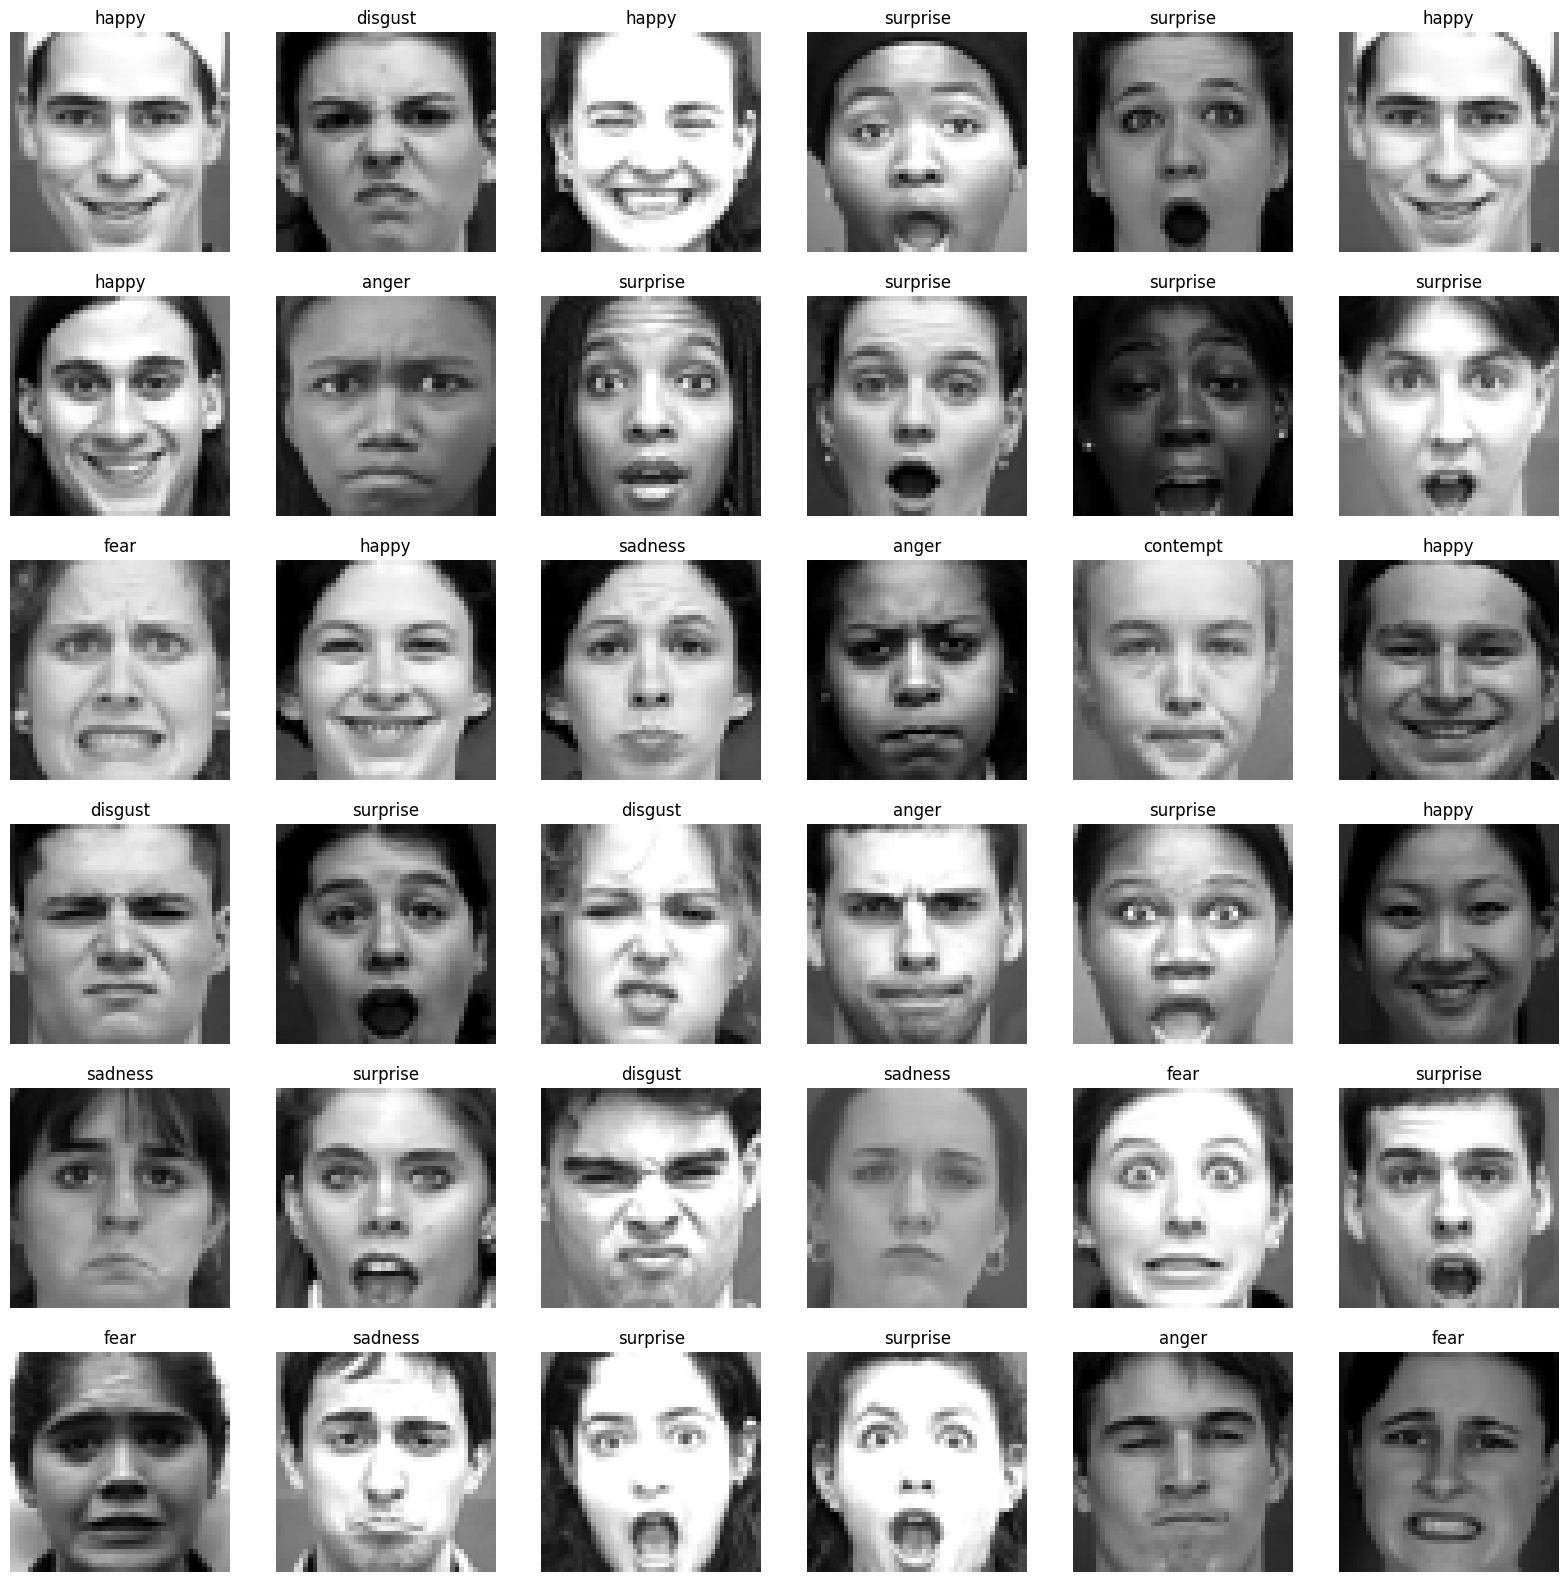

In [11]:
# Import the matplotlib.pyplot module as plt
import matplotlib.pyplot as plt

# Create a new figure with a size of 20 by 20 inches
plt.figure(figsize=(20,20))

# Loop through 36 random indices from the X_img array
for i,j in enumerate(list(np.random.randint(0,len(X_img),36))) :
    # Add a subplot to the figure at position i+1
    plt.subplot(6,6,i+1)
    # Display the image at index j from the X_img array
    plt.imshow(X_img[j])
    # Turn off the axis labels
    plt.axis('off')
    # Set the title of the subplot to the corresponding name from the Y_img array
    plt.title(names[list(Y_img[j].astype(int)).index(1)]) 


## build the CNN Model 

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

# Define function to create the model

def create_model():
    # Define the input shape of the model
    input_shape = (48, 48, 3)
    
    # Create a sequential model
    model = Sequential()
    
    # Add the first convolutional layer with 6 filters, a kernel size of (5,5), and 'relu' activation
    model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation='relu'))
    
    # Add max pooling layer with pool size (2,2)
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Add the second convolutional layer with 16 filters, a kernel size of (5,5),'relu' activation and use 'same' padding to preserve the input size
    model.add(Conv2D(16, (5, 5), padding='same', activation='relu'))
    
    # Add 'relu' activation layer
    model.add(Activation('relu'))
    
    # Add max pooling layer with pool size (2,2)
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Add the third convolutional layer with 64 filters, a kernel size of (3,3),'relu' activation  and use 'same' padding to preserve the input size
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    
    # Add max pooling layer with pool size (2,2)
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Flatten the input to 1D array
    model.add(Flatten())
    
    # Add dense layer with 128 units and 'relu' activation
    model.add(Dense(128, activation='relu'))
    
    # Add dropout layer with a rate of 0.7
    model.add(Dropout(0.7))
    
    # Add dense layer with 128 units for 7 classes and 'softmax' activation
    model.add(Dense(7, activation='softmax'))
    
    # Compile the model with categorical cross-entropy loss, accuracy metric, and 'adam' optimizer
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

## create & plot deep learning model 

In [6]:
# Call the function to create model
model=create_model()
# Print a summary of the model
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        2416      
                                                                 
 activation (Activation)     (None, 24, 24, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)      

In [7]:
# Import the pydot and graphviz modules
import pydot
import graphviz
# Import the plot_model function from the tensorflow.keras.utils module
from tensorflow.keras.utils import plot_model
# Plot the model architecture as a jpg image, with the shapes of the layers shown
plot_model(model, 'my_model.jpg',show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Train the model

In [8]:
# Train the model on the training data for 200 epochs, and evaluate it on the test data
history = model.fit(X_train,Y_train,epochs=200,validation_data = (X_test,Y_test))

Epoch 1/200


25/25 [==============================] - 9s 118ms/step - loss: 1.8598 - accuracy: 0.2156 - val_loss: 1.7410 - val_accuracy: 0.3096
Epoch 2/200
25/25 [==============================] - 3s 109ms/step - loss: 1.7849 - accuracy: 0.2946 - val_loss: 1.5951 - val_accuracy: 0.4772
Epoch 3/200
25/25 [==============================] - 2s 96ms/step - loss: 1.5528 - accuracy: 0.4349 - val_loss: 1.1524 - val_accuracy: 0.6345
Epoch 4/200
25/25 [==============================] - 2s 69ms/step - loss: 1.3001 - accuracy: 0.5293 - val_loss: 0.9274 - val_accuracy: 0.6904
Epoch 5/200
25/25 [==============================] - 2s 75ms/step - loss: 1.0904 - accuracy: 0.5804 - val_loss: 0.7529 - val_accuracy: 0.7665
Epoch 6/200
25/25 [==============================] - 2s 62ms/step - loss: 0.9210 - accuracy: 0.6658 - val_loss: 0.5812 - val_accuracy: 0.7868
Epoch 7/200
25/25 [==============================] - 1s 57ms/step - loss: 0.8455 - accuracy: 0.6824 - val_loss: 0.5576 - val_accuracy: 0.8020
Ep

25/25 [==============================] - 2s 87ms/step - loss: 0.0873 - accuracy: 0.9630 - val_loss: 0.0353 - val_accuracy: 0.9949
Epoch 113/200
25/25 [==============================] - 2s 96ms/step - loss: 0.0878 - accuracy: 0.9566 - val_loss: 0.0365 - val_accuracy: 0.9848
Epoch 114/200
25/25 [==============================] - 3s 120ms/step - loss: 0.0630 - accuracy: 0.9821 - val_loss: 0.0223 - val_accuracy: 0.9949
Epoch 115/200
25/25 [==============================] - 3s 136ms/step - loss: 0.1059 - accuracy: 0.9503 - val_loss: 0.0305 - val_accuracy: 0.9949
Epoch 116/200
25/25 [==============================] - 3s 123ms/step - loss: 0.0955 - accuracy: 0.9617 - val_loss: 0.0180 - val_accuracy: 0.9949
Epoch 117/200
25/25 [==============================] - 3s 103ms/step - loss: 0.0872 - accuracy: 0.9681 - val_loss: 0.0219 - val_accuracy: 0.9949
Epoch 118/200
25/25 [==============================] - 2s 101ms/step - loss: 0.0926 - accuracy: 0.9630 - val_loss: 0.0069 - val_accuracy: 0.9949
E

Epoch 169/200
25/25 [==============================] - 3s 135ms/step - loss: 0.0587 - accuracy: 0.9732 - val_loss: 0.0343 - val_accuracy: 0.9949
Epoch 170/200
25/25 [==============================] - 4s 152ms/step - loss: 0.0699 - accuracy: 0.9694 - val_loss: 0.0439 - val_accuracy: 0.9949
Epoch 171/200
25/25 [==============================] - 3s 113ms/step - loss: 0.0591 - accuracy: 0.9783 - val_loss: 0.0769 - val_accuracy: 0.9949
Epoch 172/200
25/25 [==============================] - 4s 149ms/step - loss: 0.0803 - accuracy: 0.9605 - val_loss: 0.0680 - val_accuracy: 0.9949
Epoch 173/200
25/25 [==============================] - 2s 94ms/step - loss: 0.0607 - accuracy: 0.9745 - val_loss: 0.0451 - val_accuracy: 0.9949
Epoch 174/200
25/25 [==============================] - 3s 114ms/step - loss: 0.0417 - accuracy: 0.9872 - val_loss: 0.0273 - val_accuracy: 0.9949
Epoch 175/200
25/25 [==============================] - 2s 90ms/step - loss: 0.0589 - accuracy: 0.9758 - val_loss: 0.0693 - val_accu

## Testing

The accuracy for testing: 99.492383
1/1 [==============================] - 1s 514ms/step
surprise


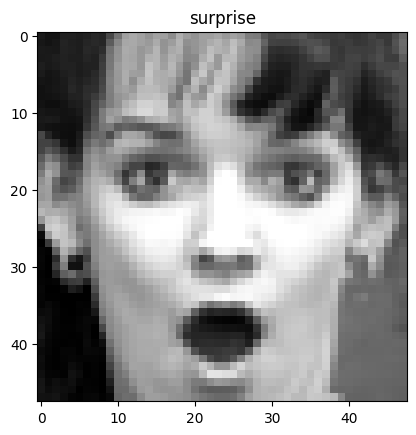

In [9]:
# Evaluate the model on the test set and obtain the loss and accuracy
loss, score = model.evaluate(X_test, Y_test, verbose=0)

# Print the accuracy for the testing set
print('The accuracy for testing: %f' % (score * 100))

# Define a function to predict the class of a sample at the given index
def predict_sample(index):
    # Use the trained model to predict the class of the sample at the specified index
    Y_predict = model.predict(X_test[index: index+1])

    # Display the image of the sample
    plt.imshow(X_test[index])

    # Set the title of the plot to the predicted class name
    plt.title(names[list(Y_predict.astype(int).flatten()).index(1)])

# Example usage: Predict the class of the sample at index 50 and display the image and true class
predict_sample(50)

# Display the true class name of the sample at index 50
print(names[list(Y_test[50]).index(1)])

## Do the comparison & plot the losses values 

<Figure size 640x480 with 0 Axes>

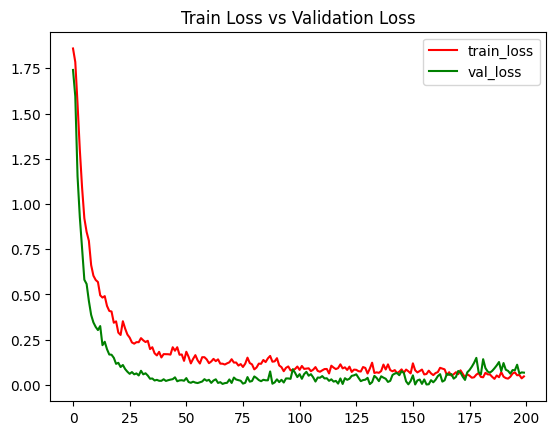

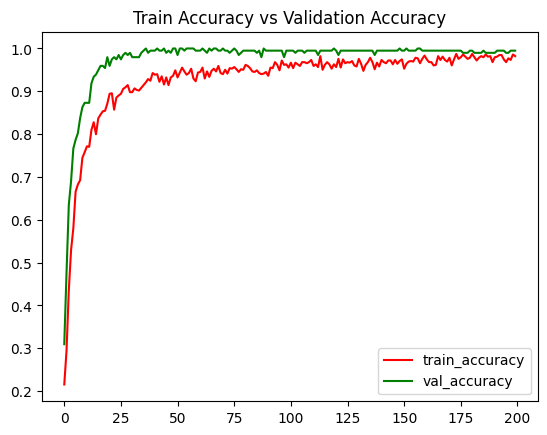

<Figure size 640x480 with 0 Axes>

In [10]:
# Extract training and validation loss from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extract training and validation accuracy from the training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of steps corresponding to the number of epochs
steps = range(len(train_loss))

# Plot the training and validation loss over epochs
plt.plot(steps, train_loss, 'r', label='train_loss')
plt.plot(steps, val_loss, 'g', label='val_loss')
plt.title('Train Loss vs Validation Loss')
plt.legend()
plt.figure()

# Plot the training and validation accuracy over epochs
plt.plot(steps, train_accuracy, 'r', label='train_accuracy')
plt.plot(steps, val_accuracy, 'g', label='val_accuracy')
plt.title('Train Accuracy vs Validation Accuracy')
plt.legend()
plt.figure()